# Etapa 3: Modelo Baseline - Regressão Linear

## Objetivos
Criar e avaliar o primeiro modelo de Machine Learning usando Regressão Linear para prever a nota final dos estudantes.

**Variável Alvo**: `final_grade` (Nota Final)

**Lembre-se**: 
- Dividir dados em treino (60%), validação (20%) e teste (20%)
- Avaliar com múltiplas métricas
- Comparar desempenho treino vs validação
- Guardar dados de teste para Etapa 5!


In [1]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib
import os
import warnings

# Configuração para exibir gráficos inline no Jupyter Notebook
%matplotlib inline

# Configurações de visualização
try:
    plt.style.use('seaborn-v0_8-darkgrid')
except:
    plt.style.use('seaborn-darkgrid')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

# Configuração para exibir todas as colunas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Configuração adicional para garantir que gráficos apareçam
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['figure.dpi'] = 100

print("Bibliotecas importadas com sucesso!")


Bibliotecas importadas com sucesso!


## 1. Carregamento dos Dados Processados

Carregar o dataset já processado da Etapa 2.


In [2]:
# Carregar dataset processado da Etapa 2
df = pd.read_csv('../../data/processed/students_clean.csv')

print("Dataset processado carregado com sucesso!")
print(f"\nFormato: {df.shape}")
print(f"Número de linhas: {df.shape[0]}")
print(f"Número de colunas: {df.shape[1]}")

# Visualizar primeiras linhas
print("\nPrimeiras linhas do dataset:")
print("="*60)
df.head()


Dataset processado carregado com sucesso!

Formato: (2510, 59)
Número de linhas: 2510
Número de colunas: 59

Primeiras linhas do dataset:


,student_id,age,study_hours_week,attendance_rate,sleep_hours,previous_scores,final_grade,gender_ F,gender_ M,gender_F,gender_Female,gender_M,gender_Male,parental_education_ doctorate,parental_education_ high_school,parental_education_ master,parental_education_BACHELOR,parental_education_DOCTORATE,parental_education_HIGH_SCHOOL,parental_education_MASTER,parental_education_bachelor,parental_education_doctorate,parental_education_high_school,parental_education_master,extracurricular_ Yes,extracurricular_NO,extracurricular_No,extracurricular_YES,extracurricular_Yes,tutoring_ Yes,tutoring_NO,tutoring_No,tutoring_YES,tutoring_Yes,internet_quality_ Good,internet_quality_ Poor,internet_quality_EXCELLENT,internet_quality_Excellent,internet_quality_GOOD,internet_quality_Good,internet_quality_POOR,internet_quality_Poor,family_income_ Low,family_income_ Medium,family_income_HIGH,family_income_High,family_income_LOW,family_income_Low,family_income_MEDIUM,family_income_Medium,health_status_ Good,health_status_ Poor,health_status_EXCELLENT,health_status_Excellent,health_status_GOOD,health_status_Good,health_status_POOR,health_status_Poor,study_sleep_ratio
0,STD01416,0.175417,-0.974905,1.029991,-0.428905,-0.869233,85.39,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,2.273016
1,STD01345,-1.128525,0.715019,-0.084645,0.980578,-0.772277,98.43,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,0.729180
2,STD01705,1.479359,0.080192,0.008848,-0.333786,1.580030,100.00,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,-0.240249
3,STD00299,-0.259230,-1.364208,0.903257,0.003452,-0.701762,86.85,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,-395.083013
4,STD01762,-1.128525,-1.289001,-0.955162,0.928696,-0.363515,83.25,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,-1.387968


## 2. Preparação dos Dados para Modelagem

Separar features (X) e variável alvo (y), e dividir em treino, validação e teste.


In [3]:
# Separar features (X) e variável alvo (y)
# Remover colunas que não são features (identificadores, variável alvo)

target = 'final_grade'
features_to_remove = ['student_id', target]

# Features são todas as colunas exceto as removidas
X = df.drop(columns=features_to_remove, errors='ignore')
y = df[target]

print("Separação de Features e Target:")
print("="*60)
print(f"Features (X): {X.shape}")
print(f"Target (y): {y.shape}")
print(f"\nNúmero de features: {X.shape[1]}")
print(f"Nome das primeiras 10 features:")
print(list(X.columns[:10]))


Separação de Features e Target:
Features (X): (2510, 57)
Target (y): (2510,)

Número de features: 57
Nome das primeiras 10 features:
['age', 'study_hours_week', 'attendance_rate', 'sleep_hours', 'previous_scores', 'gender_  F ', 'gender_  M ', 'gender_F', 'gender_Female', 'gender_M']


In [4]:
# 2.1 Dividir dados em Treino (60%), Validação (20%) e Teste (20%)
# Primeiro: separar treino+validação (80%) de teste (20%)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, 
    test_size=0.2,  # 20% para teste
    random_state=42,  # Semente para reprodutibilidade
    shuffle=True
)

# Segundo: separar treino (60%) de validação (20%)
# Do X_temp (80%), queremos 60/80 = 0.75 para treino
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp,
    test_size=0.25,  # 25% de 80% = 20% do total
    random_state=42,
    shuffle=True
)

print("Divisão dos Dados:")
print("="*60)
print(f"Treino:      {X_train.shape[0]} amostras ({X_train.shape[0]/len(df)*100:.1f}%)")
print(f"Validação:   {X_val.shape[0]} amostras ({X_val.shape[0]/len(df)*100:.1f}%)")
print(f"Teste:       {X_test.shape[0]} amostras ({X_test.shape[0]/len(df)*100:.1f}%)")
print(f"\nTotal:       {len(df)} amostras")
print(f"\n⚠️ IMPORTANTE: Dados de teste serão guardados para Etapa 5!")
print("   Usaremos apenas treino e validação nesta etapa.")


Divisão dos Dados:
Treino:      1506 amostras (60.0%)
Validação:   502 amostras (20.0%)
Teste:       502 amostras (20.0%)

Total:       2510 amostras

⚠️ IMPORTANTE: Dados de teste serão guardados para Etapa 5!
   Usaremos apenas treino e validação nesta etapa.


### Documentação: Por Que Dividir os Dados?

**Divisão Aplicada:**
- **Treino (60%)**: Usado para treinar o modelo
- **Validação (20%)**: Usado para ajustar e avaliar durante desenvolvimento
- **Teste (20%)**: Guardado para avaliação final (Etapa 5)

**Justificativa:**
- Evita overfitting: modelo não "decora" os dados de treino
- Validação honesta: testa em dados não vistos durante treino
- Teste final: avaliação final sem vazamento de informação
- Proporção 60/20/20 é um padrão comum na indústria


## 3. Treinamento do Modelo Baseline

Treinar modelo de Regressão Linear usando apenas dados de treino.


In [5]:
# 3.1 Criar e treinar o modelo de Regressão Linear
print("Treinando modelo de Regressão Linear...")
print("="*60)

# Criar modelo
model = LinearRegression()

# Treinar modelo (apenas com dados de treino!)
model.fit(X_train, y_train)

print("✅ Modelo treinado com sucesso!")
print(f"\nNúmero de features usadas: {len(model.coef_)}")
print(f"Intercepto (b0): {model.intercept_:.4f}")
print(f"\nCoeficientes das primeiras 5 features:")
for i, (feature, coef) in enumerate(zip(X_train.columns[:5], model.coef_[:5])):
    print(f"  {feature}: {coef:.4f}")


Treinando modelo de Regressão Linear...
✅ Modelo treinado com sucesso!

Número de features usadas: 57
Intercepto (b0): 103.6987

Coeficientes das primeiras 5 features:
  age: -0.0749
  study_hours_week: 4.6419
  attendance_rate: 0.9967
  sleep_hours: 1.1277
  previous_scores: 1.4549


In [6]:
# 3.2 Fazer predições nos dados de treino e validação
print("\nFazendo predições...")
print("="*60)

# Predições
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

print("✅ Predições realizadas!")
print(f"\nExemplos de predições (primeiras 5):")
print(f"Valores Reais:    {y_train.values[:5]}")
print(f"Predições:        {y_train_pred[:5]}")
print(f"Erros:            {y_train.values[:5] - y_train_pred[:5]}")



Fazendo predições...
✅ Predições realizadas!

Exemplos de predições (primeiras 5):
Valores Reais:    [100.    83.61  98.06  94.25  93.88]
Predições:        [94.63166853 88.20727366 93.13538701 94.01748461 89.63392489]
Erros:            [ 5.36833147 -4.59727366  4.92461299  0.23251539  4.24607511]


## 4. Avaliação do Modelo - Métricas

Calcular as 4 métricas principais: MSE, RMSE, MAE e R² para treino e validação.


In [7]:
# 4.1 Calcular métricas para dados de TREINO
print("Métricas - Dados de TREINO:")
print("="*60)

mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print(f"MSE  (Erro Quadrático Médio):     {mse_train:.4f}")
print(f"RMSE (Raiz do Erro Quadrático):    {rmse_train:.4f}")
print(f"MAE  (Erro Absoluto Médio):        {mae_train:.4f}")
print(f"R²   (Coeficiente de Determinação): {r2_train:.4f} ({r2_train*100:.2f}%)")


Métricas - Dados de TREINO:
MSE  (Erro Quadrático Médio):     16.8614
RMSE (Raiz do Erro Quadrático):    4.1063
MAE  (Erro Absoluto Médio):        3.1298
R²   (Coeficiente de Determinação): 0.7023 (70.23%)


In [8]:
# 4.2 Calcular métricas para dados de VALIDAÇÃO
print("\nMétricas - Dados de VALIDAÇÃO:")
print("="*60)

mse_val = mean_squared_error(y_val, y_val_pred)
rmse_val = np.sqrt(mse_val)
mae_val = mean_absolute_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

print(f"MSE  (Erro Quadrático Médio):     {mse_val:.4f}")
print(f"RMSE (Raiz do Erro Quadrático):    {rmse_val:.4f}")
print(f"MAE  (Erro Absoluto Médio):        {mae_val:.4f}")
print(f"R²   (Coeficiente de Determinação): {r2_val:.4f} ({r2_val*100:.2f}%)")



Métricas - Dados de VALIDAÇÃO:
MSE  (Erro Quadrático Médio):     17.6868
RMSE (Raiz do Erro Quadrático):    4.2056
MAE  (Erro Absoluto Médio):        3.2181
R²   (Coeficiente de Determinação): 0.6874 (68.74%)


In [9]:
# 4.3 Criar tabela comparativa de métricas
print("\n" + "="*60)
print("TABELA COMPARATIVA: Treino vs Validação")
print("="*60)

metrics_comparison = pd.DataFrame({
    'Treino': [mse_train, rmse_train, mae_train, r2_train],
    'Validação': [mse_val, rmse_val, mae_val, r2_val]
}, index=['MSE', 'RMSE', 'MAE', 'R²'])

# Calcular diferença
metrics_comparison['Diferença'] = metrics_comparison['Treino'] - metrics_comparison['Validação']
metrics_comparison['Diferença (%)'] = ((metrics_comparison['Treino'] - metrics_comparison['Validação']) / metrics_comparison['Treino'] * 100).round(2)

print(metrics_comparison)



TABELA COMPARATIVA: Treino vs Validação
         Treino  Validação  Diferença  Diferença (%)
MSE   16.861427  17.686792  -0.825365          -4.89
RMSE   4.106267   4.205567  -0.099300          -2.42
MAE    3.129832   3.218093  -0.088262          -2.82
R²     0.702304   0.687364   0.014941           2.13


### Documentação: Interpretação das Métricas

**MSE (Erro Quadrático Médio):**
- Treino: [preencher após execução]
- Validação: [preencher após execução]
- Interpretação: [explicar o que significa]

**RMSE (Raiz do Erro Quadrático Médio):**
- Treino: [preencher após execução] pontos
- Validação: [preencher após execução] pontos
- Interpretação: Em média, o modelo erra por aproximadamente [X] pontos

**MAE (Erro Absoluto Médio):**
- Treino: [preencher após execução] pontos
- Validação: [preencher após execução] pontos
- Interpretação: [explicar diferença do RMSE]

**R² (Coeficiente de Determinação):**
- Treino: [preencher após execução] ([X]%)
- Validação: [preencher após execução] ([X]%)
- Interpretação: O modelo explica aproximadamente [X]% da variação nas notas finais

**Análise de Overfitting:**
- Diferença R²: [preencher após execução]
- Conclusão: [O modelo está generalizando bem? Há overfitting?]


## 5. Visualizações

Criar gráficos para visualizar o desempenho do modelo.


Criando gráfico: Predições vs Valores Reais...


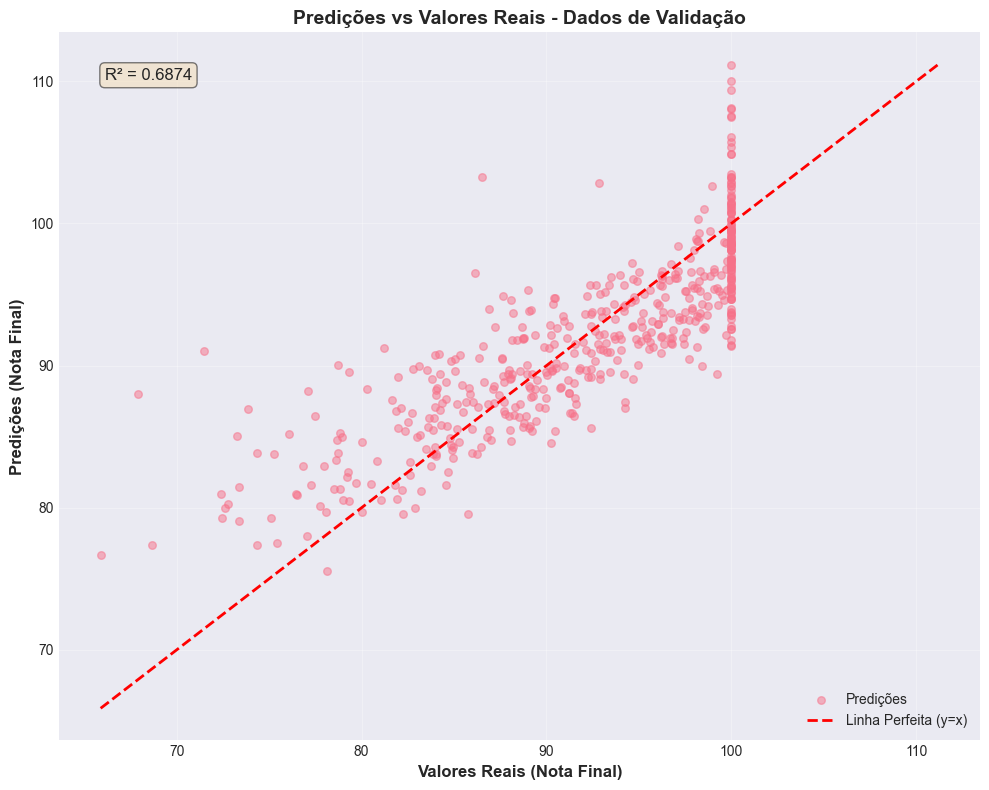

✅ Gráfico criado!


In [ ]:
# 5.1 Gráfico: Predições vs Valores Reais (Validação)
print("Criando gráfico: Predições vs Valores Reais...")
print("="*60)

plt.figure(figsize=(10, 8))

# Scatter plot
plt.scatter(y_val, y_val_pred, alpha=0.5, s=30, label='Predições do Modelo', color='steelblue')

# Linha perfeita (y = x)
min_val = min(y_val.min(), y_val_pred.min())
max_val = max(y_val.max(), y_val_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Linha Perfeita (Predição = Real)')

# Configurações do gráfico
plt.xlabel('Valores Reais (Nota Final)', fontsize=12, fontweight='bold')
plt.ylabel('Predições do Modelo (Nota Final)', fontsize=12, fontweight='bold')
plt.title('Comparação: Predições vs Valores Reais\n(Dados de Validação)', fontsize=14, fontweight='bold')
plt.legend(fontsize=10, loc='lower right')
plt.grid(alpha=0.3)

# Adicionar R² e RMSE no gráfico
textstr = f'R² = {r2_val:.4f} ({r2_val*100:.2f}%)\nRMSE = {rmse_val:.2f} pontos'
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes,
         fontsize=11, verticalalignment='top', 
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.7))

plt.tight_layout()
plt.show()

print("✅ Gráfico criado!")



Criando gráfico: Distribuição de Resíduos...


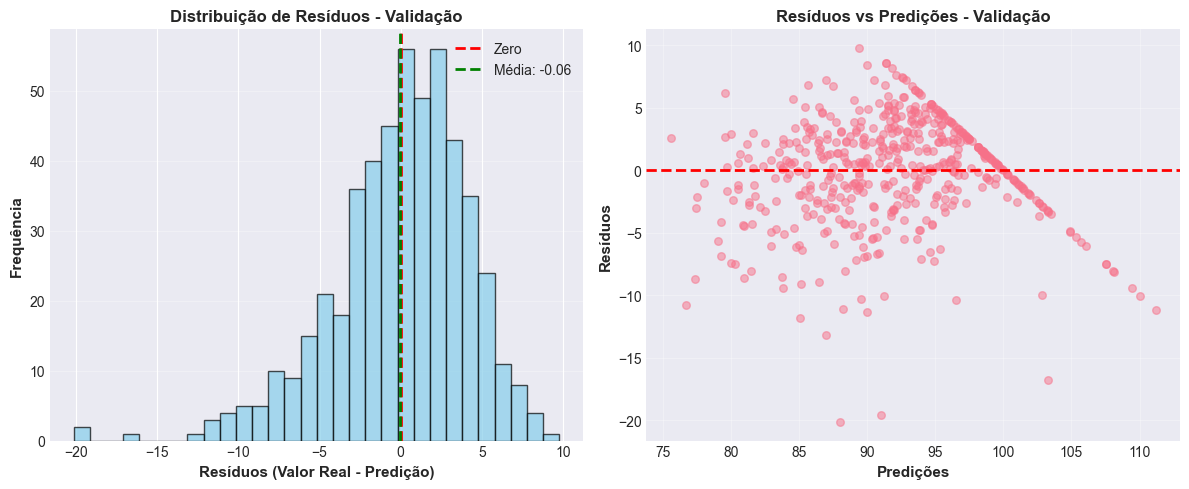

✅ Gráfico criado!

Estatísticas dos Resíduos:
  Média: -0.0623 (deve ser próxima de 0)
  Desvio Padrão: 4.2093
  Mínimo: -20.1248
  Máximo: 9.7657


In [ ]:
# 5.2 Gráfico: Distribuição de Resíduos (Validação)
print("\nCriando gráfico: Distribuição de Resíduos...")
print("="*60)

# Calcular resíduos
residuos = y_val - y_val_pred

plt.figure(figsize=(13, 5))

# Subplot 1: Histograma dos resíduos
plt.subplot(1, 2, 1)
plt.hist(residuos, bins=30, edgecolor='black', alpha=0.7, color='skyblue', label='Distribuição dos Resíduos')
plt.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Zero (Ideal)')
plt.axvline(x=residuos.mean(), color='green', linestyle='--', linewidth=2, label=f'Média: {residuos.mean():.2f}')
plt.xlabel('Resíduos (Valor Real - Predição)', fontsize=11, fontweight='bold')
plt.ylabel('Frequência (Quantidade de Amostras)', fontsize=11, fontweight='bold')
plt.title('Histograma: Distribuição dos Resíduos\n(Dados de Validação)', fontsize=12, fontweight='bold')
plt.legend(fontsize=9)
plt.grid(axis='y', alpha=0.3)

# Subplot 2: Resíduos vs Predições
plt.subplot(1, 2, 2)
plt.scatter(y_val_pred, residuos, alpha=0.5, s=30, color='steelblue')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Zero (Ideal)')
plt.xlabel('Predições do Modelo (Nota Final)', fontsize=11, fontweight='bold')
plt.ylabel('Resíduos (Valor Real - Predição)', fontsize=11, fontweight='bold')
plt.title('Resíduos vs Predições\n(Verificar Padrões)', fontsize=12, fontweight='bold')
plt.legend(fontsize=9)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Gráfico criado!")

# Estatísticas dos resíduos
print(f"\nEstatísticas dos Resíduos:")
print(f"  Média: {residuos.mean():.4f} (ideal: próxima de 0)")
print(f"  Desvio Padrão: {residuos.std():.4f}")
print(f"  Mínimo: {residuos.min():.4f}")
print(f"  Máximo: {residuos.max():.4f}")
print(f"\n💡 Interpretação:")
if abs(residuos.mean()) < 0.5:
    print(f"  ✅ Média próxima de zero: modelo não tem viés sistemático")
else:
    print(f"  ⚠️ Média distante de zero: modelo pode ter viés")


### Documentação: Interpretação dos Gráficos

**Gráfico 1: Predições vs Valores Reais**
- [Descrever o que observa: pontos próximos da linha? dispersos?]
- [Há padrões visíveis? Tendência de sub/superestimar?]

**Gráfico 2: Distribuição de Resíduos**
- [Os resíduos estão centrados em zero?]
- [A distribuição é simétrica? Tem forma de sino?]
- [Há outliers nos resíduos?]
- [Os resíduos vs predições mostram algum padrão?]


## 6. Análise de Features Importantes

Identificar quais features são mais importantes para o modelo.


Análise de Features Importantes:

Top 10 Features Mais Importantes:
             Feature  Coeficiente  Coeficiente_Absoluto
         gender_  F    -11.601840             11.601840
         gender_Male   -10.072023             10.072023
            gender_M    -7.704039              7.704039
            gender_F    -7.624550              7.624550
  health_status_POOR    -7.394881              7.394881
family_income_  Low     -7.391676              7.391676
         gender_  M     -6.144998              6.144998
family_income_MEDIUM    -5.983221              5.983221
   family_income_Low    -5.354842              5.354842
  health_status_Poor    -4.734191              4.734191


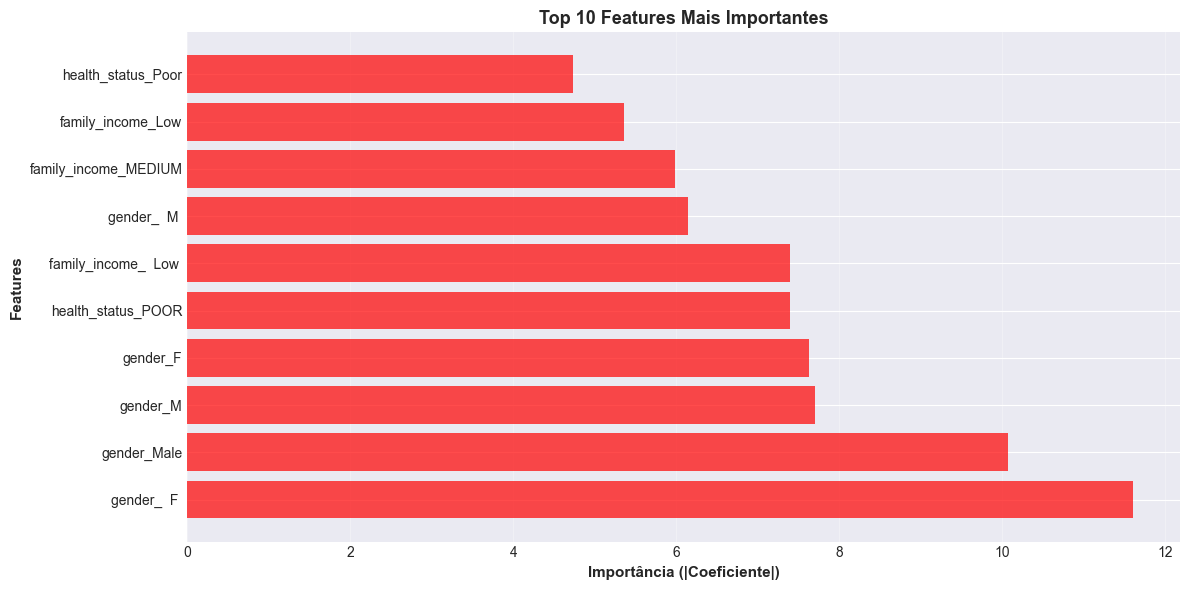


✅ Análise de features concluída!


In [ ]:
# 6.1 Criar tabela com coeficientes (importância das features)
print("Análise de Features Importantes:")
print("="*60)

# Criar DataFrame com coeficientes
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coeficiente': model.coef_,
    'Coeficiente_Absoluto': np.abs(model.coef_)
})

# Ordenar por valor absoluto (maior impacto)
feature_importance = feature_importance.sort_values('Coeficiente_Absoluto', ascending=False)

print("\nTop 10 Features Mais Importantes:")
print("="*60)
print(feature_importance.head(10).to_string(index=False))

# Visualizar top 10 features
plt.figure(figsize=(12, 7))
top_10 = feature_importance.head(10)
colors = ['darkgreen' if x > 0 else 'darkred' for x in top_10['Coeficiente']]
bars = plt.barh(range(len(top_10)), top_10['Coeficiente_Absoluto'], color=colors, alpha=0.7, edgecolor='black')
plt.yticks(range(len(top_10)), top_10['Feature'], fontsize=10)
plt.xlabel('Importância Absoluta (|Coeficiente|)', fontsize=12, fontweight='bold')
plt.ylabel('Features (Variáveis)', fontsize=12, fontweight='bold')
plt.title('Top 10 Features Mais Importantes para o Modelo\n(Verde = Aumenta Nota | Vermelho = Diminui Nota)', 
          fontsize=13, fontweight='bold')
plt.grid(axis='x', alpha=0.3)

# Adicionar valores nas barras
for i, (bar, coef) in enumerate(zip(bars, top_10['Coeficiente'])):
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, 
             f' {coef:.2f}', ha='left', va='center', fontsize=9, fontweight='bold')

# Adicionar legenda de cores
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='darkgreen', alpha=0.7, label='Coeficiente Positivo (Aumenta Nota)'),
                  Patch(facecolor='darkred', alpha=0.7, label='Coeficiente Negativo (Diminui Nota)')]
plt.legend(handles=legend_elements, loc='lower right', fontsize=9)

plt.tight_layout()
plt.show()

print("\n✅ Análise de features concluída!")


### Documentação: Features Importantes

**Top 3 Features Mais Importantes:**

1. **[Feature 1]**: Coeficiente = [valor]
   - Interpretação: [explicar o que significa este coeficiente]

2. **[Feature 2]**: Coeficiente = [valor]
   - Interpretação: [explicar o que significa este coeficiente]

3. **[Feature 3]**: Coeficiente = [valor]
   - Interpretação: [explicar o que significa este coeficiente]

**Observações:**
- [Coeficientes positivos aumentam a nota final?]
- [Coeficientes negativos diminuem a nota final?]
- [Alguma feature surpreendeu?]


## 7. Salvamento do Modelo

Salvar o modelo treinado para uso futuro.


In [13]:
# 7.1 Salvar o modelo treinado
print("Salvando modelo...")
print("="*60)

# Criar diretório models se não existir
os.makedirs('../../models', exist_ok=True)

# Salvar modelo
model_path = '../../models/modelo_baseline.pkl'
joblib.dump(model, model_path)

print(f"✅ Modelo salvo em: {model_path}")
print(f"   Formato: Regressão Linear")
print(f"   Features: {X_train.shape[1]}")
print(f"   Métricas de Validação:")
print(f"     - R²: {r2_val:.4f}")
print(f"     - RMSE: {rmse_val:.4f}")
print(f"     - MAE: {mae_val:.4f}")

# Verificar tamanho do arquivo
if os.path.exists(model_path):
    file_size = os.path.getsize(model_path) / 1024  # KB
    print(f"   Tamanho: {file_size:.2f} KB")


Salvando modelo...
✅ Modelo salvo em: ../../models/modelo_baseline.pkl
   Formato: Regressão Linear
   Features: 57
   Métricas de Validação:
     - R²: 0.6874
     - RMSE: 4.2056
     - MAE: 3.2181
   Tamanho: 2.92 KB


In [14]:
# 7.2 Salvar dados de teste para Etapa 5 (IMPORTANTE!)
print("\nSalvando dados de teste para Etapa 5...")
print("="*60)

# Criar diretório se não existir
os.makedirs('../../data/processed', exist_ok=True)

# Salvar dados de teste
X_test.to_csv('../../data/processed/X_test.csv', index=False)
y_test.to_csv('../../data/processed/y_test.csv', index=False)

print("✅ Dados de teste salvos:")
print(f"   X_test: ../../data/processed/X_test.csv ({X_test.shape})")
print(f"   y_test: ../../data/processed/y_test.csv ({y_test.shape})")
print("\n⚠️ IMPORTANTE: Não use estes dados até a Etapa 5!")



Salvando dados de teste para Etapa 5...
✅ Dados de teste salvos:
   X_test: ../../data/processed/X_test.csv ((502, 57))
   y_test: ../../data/processed/y_test.csv ((502,))

⚠️ IMPORTANTE: Não use estes dados até a Etapa 5!


## 8. Resumo e Conclusões

Resumo final dos resultados e próximos passos.


In [15]:
# Resumo final
print("="*80)
print("RESUMO DO MODELO BASELINE")
print("="*80)

print(f"\n📊 Métricas de Desempenho:")
print(f"   R² Treino:      {r2_train:.4f} ({r2_train*100:.2f}%)")
print(f"   R² Validação:   {r2_val:.4f} ({r2_val*100:.2f}%)")
print(f"   Diferença:      {r2_train - r2_val:.4f} ({(r2_train - r2_val)*100:.2f}%)")

print(f"\n📈 Erros:")
print(f"   RMSE Validação: {rmse_val:.4f} pontos")
print(f"   MAE Validação:  {mae_val:.4f} pontos")

print(f"\n🔍 Análise de Overfitting:")
diff_r2 = r2_train - r2_val
if diff_r2 < 0.10:
    status = "✅ Modelo generalizando bem (sem overfitting significativo)"
elif diff_r2 < 0.20:
    status = "⚠️ Possível overfitting leve"
else:
    status = "❌ Overfitting detectado"
print(f"   {status}")

print(f"\n💾 Arquivos Salvos:")
print(f"   Modelo: ../../models/modelo_baseline.pkl")
print(f"   Dados de teste: ../../data/processed/X_test.csv e y_test.csv")

print("\n" + "="*80)
print("ETAPA 3 CONCLUÍDA!")
print("="*80)


RESUMO DO MODELO BASELINE

📊 Métricas de Desempenho:
   R² Treino:      0.7023 (70.23%)
   R² Validação:   0.6874 (68.74%)
   Diferença:      0.0149 (1.49%)

📈 Erros:
   RMSE Validação: 4.2056 pontos
   MAE Validação:  3.2181 pontos

🔍 Análise de Overfitting:
   ✅ Modelo generalizando bem (sem overfitting significativo)

💾 Arquivos Salvos:
   Modelo: ../../models/modelo_baseline.pkl
   Dados de teste: ../../data/processed/X_test.csv e y_test.csv

ETAPA 3 CONCLUÍDA!


### Documentação: Storytelling e Conclusões

#### Contexto
[Descrever o objetivo do modelo e o problema que resolve]

#### Metodologia
[Explicar como os dados foram divididos e como o modelo foi treinado]

#### Resultados Principais
[Interpretar as métricas em linguagem simples e clara]

#### Análise de Overfitting
[Analisar se há overfitting e o que isso significa]

#### Features Mais Importantes
[Explicar quais features são mais relevantes e por quê]

#### Conclusões
[Resumir o desempenho geral do modelo]

#### Próximos Passos para Etapa 4
[O que pode ser melhorado? Quais modelos testar?]
